# Sales Analysis

## PROBLEM STATEMENT :
To perform a detailed analysis of a dataset containing sales information and order quantities, we would typically follow a series of steps in the data analysis process. Below is a structured approach to performing the analysis, which includes data cleaning, exploratory data analysis (EDA), and generating insights based on the data.

### Objectives:

Importing necessary Libraries/Modules:
- Import the modules necessary for Data Manipulation and Visualization.

Loading dataset:
- Read the dataset containing sales information.

Task 1 - Data Cleaning:

Task 2 - Add month column:

Task 3 - Add sales column to the dataframe

Task 4 - Add City column to the dataframe

Task 5 - Add hour column to the dataframe

### Questions:

Question 1 - What was the best month for sales? How much was earned that month?

Question 2 - Which city had the highest number of sales?

Question 3 - What time should we display the advertisements to maximize likelihood of customer's buying

Question 4 - What products are sold together

Question 5 - SHow the sales, prices and product in same graph.

### CONCLUSION

### IMPORTING LIBRARIES/MODULES

In [184]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, FuncFormatter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Get the list of all CSV files in the directory

In [195]:
files=[file for file in os.listdir("./DirtySalesDate")if file.endswith(".csv")]

### We have 12 CSV files, one for each month of the year 2019. Let's combine them into a single CSV file for easier analysis.


In [198]:
# Create an empty Dataframe to hold the combined data
all_df=pd.DataFrame()

# Read and concatenate each CSV file
for i in files:
    month_data=pd.read_csv("./DirtySalesDate"+"//"+i)
    all_df=pd.concat([all_df,month_data])

### Read the updated DataFrame

In [9]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### DataFrame Specifics

In [11]:
all_df.shape

(186850, 6)

In [12]:
all_df.size

1121100

In [13]:
all_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [14]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


### Rows with NAN/ null values

In [16]:
all_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [17]:
null_df = all_df[all_df.isna().any(axis=1)]
null_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
null_df.shape

(545, 6)

## Task 1: Data Cleaning

### Drop rows with NaN

In [21]:
all_df = all_df.dropna()
all_df.shape

(186305, 6)

### Rows with random data

In [23]:
or_df = all_df[all_df['Order Date'].str[0:2]=='Or']
or_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Drop rows with random data

In [25]:
all_df=all_df[all_df['Order Date'].str[0:2]!='Or']
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Augment data with additional columns

## Task 2: Add month column

In [28]:
all_df['Month']=all_df['Order Date'].str[0:2].astype(int)
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Add DataFrame to new .csv

In [30]:
all_df.to_csv("All_unfiltered_data.csv")

# Question 1: What was the best month for sales? How much was earned that month?

In [32]:
all_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6


In [33]:
all_df['Quantity Ordered'] = pd.to_numeric(all_df['Quantity Ordered'])
all_df['Price Each'] = pd.to_numeric(all_df['Price Each'])

## Task 3: Add sales column to the dataframe

In [35]:
all_df['Sales']=all_df['Quantity Ordered']*all_df['Price Each']
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [36]:
sum_of_sales=all_df.groupby('Month')['Sales'].sum()
sum_of_sales_df = sum_of_sales.reset_index()
sum_of_sales_df.columns = ['Month', 'Total_Sales']
sum_of_sales_df

,Month,Total_Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


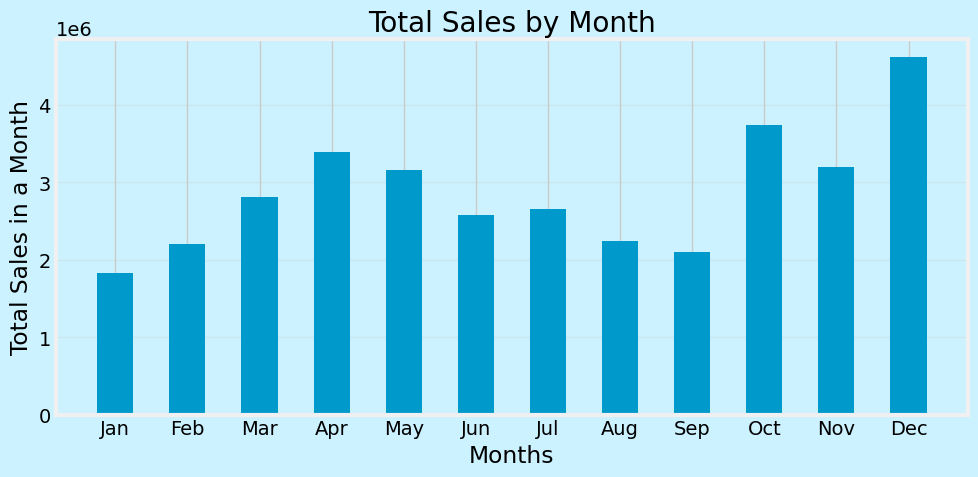

In [161]:
plt.style.use('fivethirtyeight')

# Create the figure and set the background color
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor("#ccf2ff")  # Set figure background color
ax.set_facecolor("#ccf2ff")         # Set axes background color

# Plot bar chart with a customized bar color
plt.bar([i for i in range(1, 13)], sum_of_sales_df['Total_Sales'], color="#0099cc",width=0.5)

# Set month names for the x-axis
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Label axes and title
plt.xlabel("Months")
plt.ylabel("Total Sales in a Month")
plt.title("Total Sales by Month")

# Adjust grid visibility
plt.grid(axis='y', alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()

<div style="background-color:#ccf2ff; padding:1px;"> The best month for sales is December (Month 12), with a total of $4,613,443.34 in sales.**
December (Month 12) has the highest sales at 4,613,443.34 dollars, nearly doubling the sales of January, which had the lowest sales at 1,822,256.73 dollars. This suggests that sales tend to increase toward the end of the year, likely due to seasonal factors such as the holiday shopping season.<div>

## Task 4: Add City column to the dataframe

In [39]:
all_df['City']=all_df["Purchase Address"].apply(lambda x : x.split(",")[1]+" "+"("+x.split(",")[2].split(" ")[1]+")")
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


# Question 2: Which city had the highest number of sales?

In [41]:
for_city=all_df.groupby('City')['Sales'].sum().sort_values(ascending=False)
sum_for_city = for_city.reset_index()
sum_for_city.columns=['City','Total sales']
sum_for_city

,City,Total sales
0,San Francisco (CA),8262203.91
1,Los Angeles (CA),5452570.80
2,New York City (NY),4664317.43
3,Boston (MA),3661642.01
4,Atlanta (GA),2795498.58
5,Dallas (TX),2767975.40
6,Seattle (WA),2747755.48
7,Portland (OR),1870732.34
8,Austin (TX),1819581.75
9,Portland (ME),449758.27


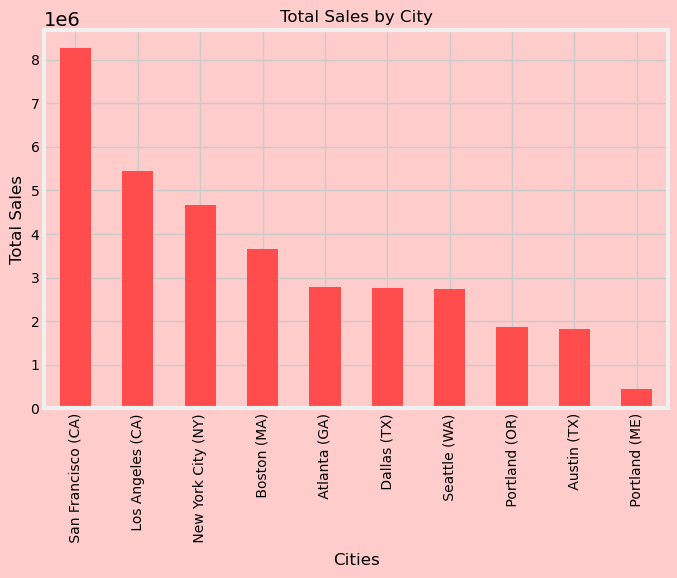

In [140]:
plt.style.use("fivethirtyeight")

# Create the figure with a background color
fig, ax = plt.subplots(figsize=(7,6))
fig.patch.set_facecolor("#ffcccc")  # Figure background
ax.set_facecolor('#ffcccc')# Replace '#f0f0f0' with your preferred color

# Plot the data
for_city.plot(kind="bar",color="#ff4d4d")

# Label the axes and title
plt.xlabel('Cities', size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Total Sales by City', size=12)

# Adjust tick size and rotation
plt.yticks(size=10)
plt.xticks(rotation=90, size=10)

# Ensure layout is tight
plt.tight_layout()

# Display the plot
plt.show()

<div style="background-color:#ffcccc; padding:10px;"> 
    San Francisco (CA) leads the cities in total sales revenue, with over 8.26 million dollars,
while Portland (ME) shows the lowest sales at just under 450K, highlighting significant regional difference
     in sales performance.<div>

# Question 3: what time should we display the advertisements to maximize likelihood of customer's buying

## Task 5: Add hour column to the dataframe

In [45]:
all_df['Order Date']=pd.to_datetime(all_df['Order Date'])
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [46]:
all_df['Hours']=all_df['Order Date'].dt.hour
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12


In [47]:
by_hours=all_df.groupby('Hours')['Sales'].sum()
gp_by_hours = by_hours.reset_index()
gp_by_hours.columns = ['Hours','Total sales']
gp_by_hours['Hours'] = gp_by_hours['Hours'] + 1
gp_by_hours

,Hours,Total sales
0,1,713721.27
1,2,460866.88
2,3,234851.44
3,4,145757.89
4,5,162661.01
5,6,230679.82
6,7,448113.00
7,8,744854.12
8,9,1192348.97
9,10,1639030.58


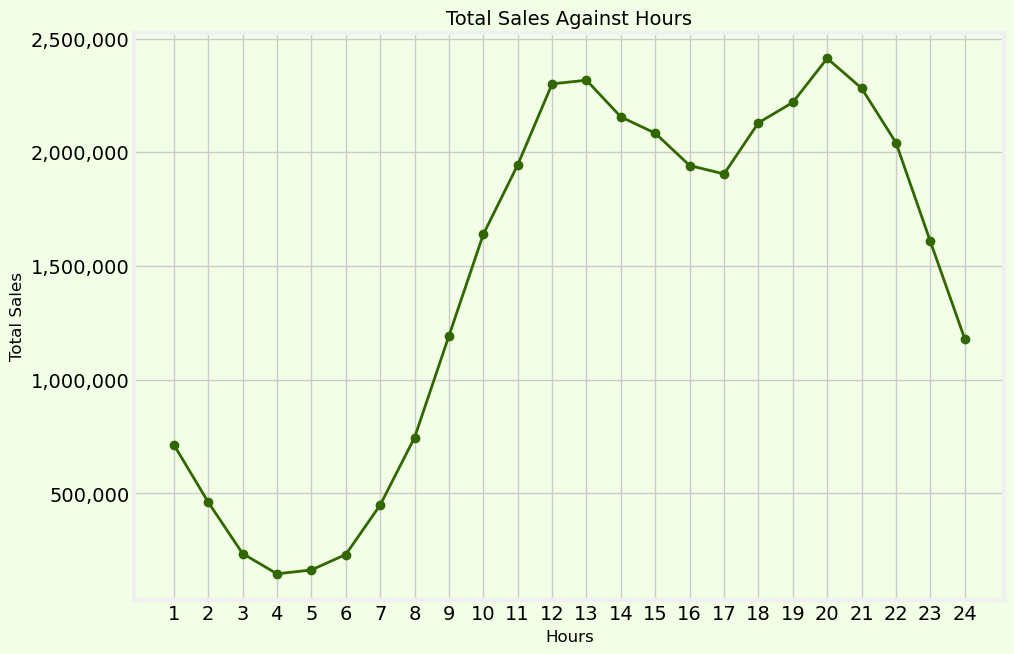

In [168]:
 #Set the style to fivethirtyeight
plt.style.use("fivethirtyeight")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Set the background color
fig.patch.set_facecolor("#f2ffe6")  # Figure background
ax.set_facecolor('#f2ffe6')  # Plot area background

# Plotting the data
ax.plot(gp_by_hours['Hours'], gp_by_hours['Total sales'], color="#316600", marker="o", linestyle="-", linewidth=2, markersize=6)

# Set x and y labels
plt.xlabel("Hours", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

# Set title
plt.title("Total Sales Against Hours", fontsize=14)

# Customize the x-axis ticks
ax.xaxis.set_major_locator(MultipleLocator(1))  # Set ticks every 1 hour
ax.set_xticks(gp_by_hours['Hours'])  # Align ticks with data points

# Format y-axis labels with commas
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Show the graph
plt.show()

<div style="background-color:#f2ffe6; padding:10px;">The graph shows:

Low sales during early morning (2-5 AM) and late night (after 9 PM).
Peak sales in the mid-morning (10-11 AM) and evening (5-8 PM).
Midday stability with a slight dip post-lunch (2-3 PM).
Optimize resources during peak hours and reduce costs during low-activity periods.<div>

In [203]:
all_df.to_excel("Sales Analysis.xlsx")

# Question 4: What products are sold together

In [50]:
sold_together = all_df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

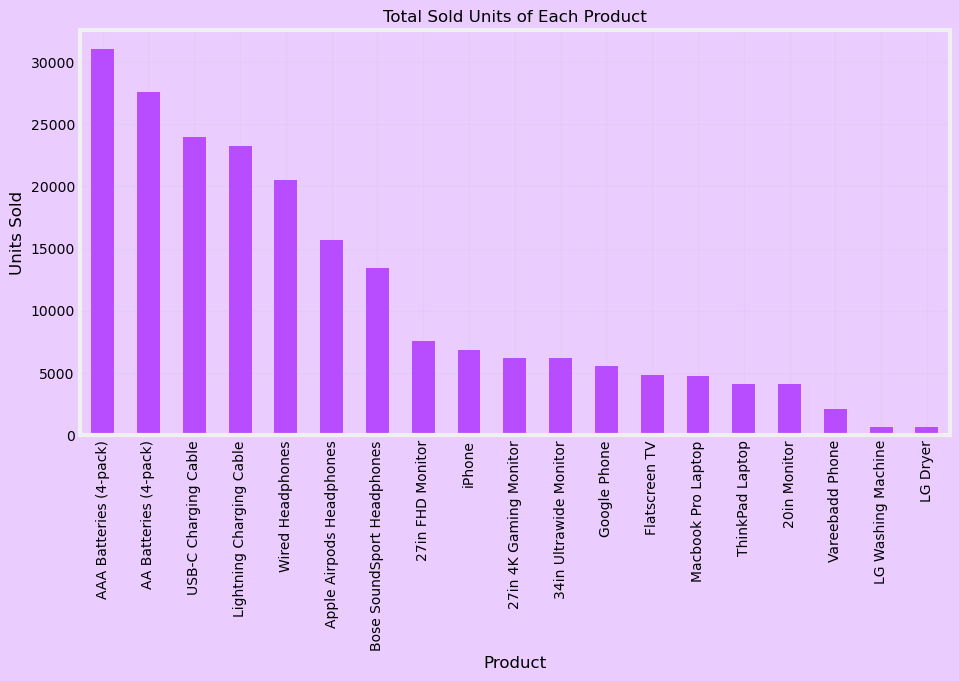

In [176]:
#Apply fivethirtyeight style
plt.style.use("fivethirtyeight")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Set the background colors
fig.patch.set_facecolor('#ebccff')  # Set figure background color
ax.set_facecolor('#ebccff')            # Set plot area (axes) background color

# Plot the data as a bar chart
sold_together.plot(kind="bar", ax=ax, color="#b84dff")

# Add title and labels
plt.title("Total Sold Units of Each Product", fontsize=12)
plt.ylabel("Units Sold",size=12)
plt.xlabel("Product",size=12)

plt.xticks(size=10)
plt.yticks(size=10)
# Add a grid with lower alpha for transparency
plt.grid(alpha=0.2)

# Show the plot
plt.show()

<div style="background-color:#ebccff; padding:10px;">
The best-selling product is the AAA Batteries (4-pack), with a total of 31,017 units sold, followed by the AA Batteries (4-pack) with a total of 27,635 units sold. The high sales of AAA batteries can likely be attributed to their widespread use in small electronic devices such as remote controls, flashlights, toys, clocks, and more.**</div>

# Question 5: SHow the sales, prices and product in same graph.

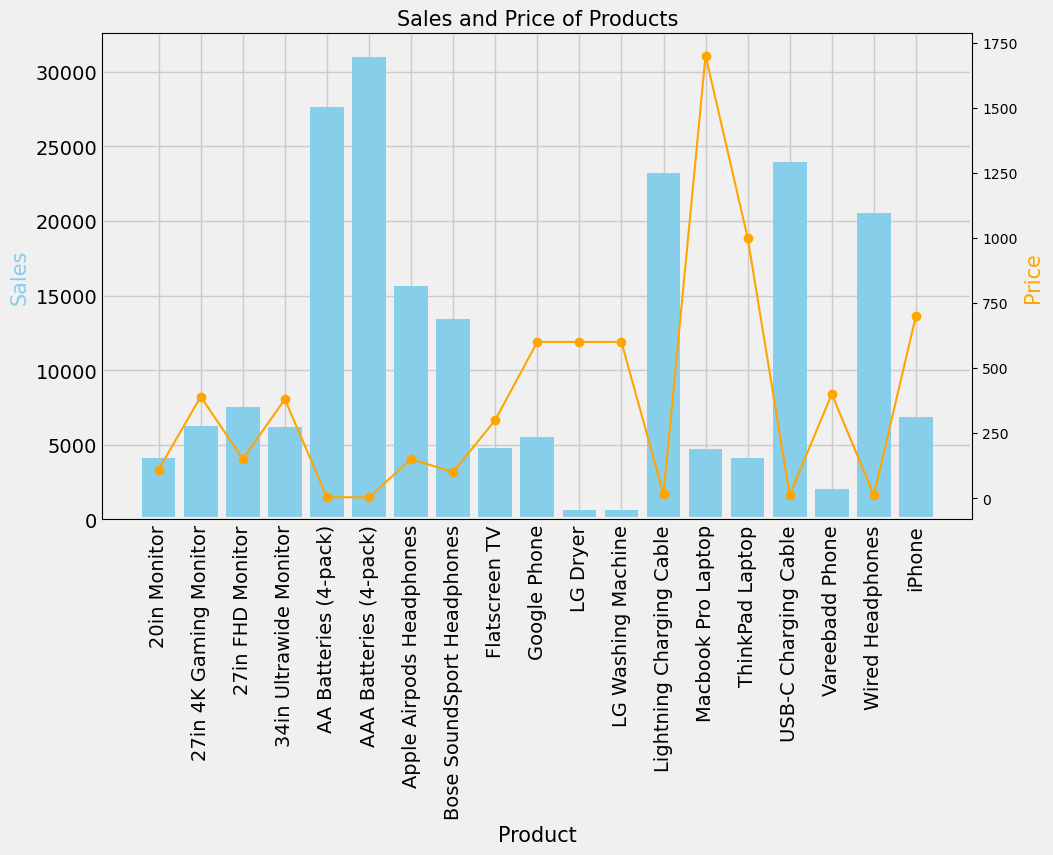

In [54]:
price_sale=all_df.groupby(["Product","Price Each"])["Quantity Ordered"].sum()

price_sale_df=pd.DataFrame(price_sale)

price_sale_df.reset_index(inplace=True)

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.style.use("default")
# Bar plot for Sales
ax1.bar(price_sale_df['Product'], price_sale_df['Quantity Ordered'], color='skyblue', label='Sales')
ax2 = ax1.twinx()
# line plot for Price
ax2.plot(price_sale_df['Product'], price_sale_df['Price Each'], color='orange', marker='o', label='Price')


ax1.set_xlabel('Product',fontsize=15)
ax1.set_ylabel('Sales', color='skyblue',fontsize=15)
ax1.tick_params(axis="y",color="skyblue")
ax2.set_ylabel('Price', color='orange',fontsize=15)
# ax1.set_xticklabels(rotation="vertical")
ax1.set_xticklabels(price_sale_df['Product'], rotation=90)

# Title and show plot
plt.title('Sales and Price of Products',fontsize=15)
plt.show()

Products like USB-C Charging Cable and AAA Batteries are low in price but show decent sales, making them affordable and accessible.MacBook Pro Laptop has a high price but moderate sales.Bose SoundSport Headphones and Apple AirPods Headphones have a balanced combination of moderate pricing and high sales, suggesting good value and popularity. FlatScreen TV has moderate sales but a noticeable price.

## CONCLUSION

This analysis highlights key trends in sales performance, regional differences, and product popularity. 
- December was the best month for sales, nearly doubling January's figures, suggesting a strong seasonal boost driven by holiday shopping.
- Regionally, San Francisco led with over 8.26 million dollars in sales, while Portland (ME) showed the lowest sales at under 450K, indicating significant regional variations.
- In terms of products, the AAA Batteries (4-pack) were the best-sellers, with 31,017 units sold, reflecting strong demand for affordable, everyday items.
- Other popular products like the AA Batteries and USB-C Charging Cables also performed well, while higher-ticket items such as the MacBook Pro and Apple AirPods showed solid sales at higher price points.

Overall, this data underscores the importance of seasonal trends, regional markets, and consumer preferences in shaping sales strategies. Products with low price points and high utility, like batteries, drive volume sales, while premium items cater to customers seeking value in quality and performance.